# Settings synchronization
Typical use case: import settings readings from .snp file to machine, the basic procedure is:
1. .snp file
2. model the section of interest (e.g. LEBT) to create a high-level lattice object
3. read settings
4. change the lattice settings attribute (model settings)
5. synchronize the settings to machine

**Keep in mind**: the settings attached to high-level lattice is always physics settings, but the target devices only accept engineering input.

In [1]:
from phantasy import MachinePortal
from phantasy import generate_settings

from phantasy.tools import plot_orbit
from phantasy import disable_warnings
disable_warnings() # if you do not wanna be disturbed by logging messages, or just comment out this line

In [2]:
mp = MachinePortal(machine='LEBT')
lat = mp.work_lattice_conf
snpfile = './Ar_LEBT_to_MEBT_20180321.snp'
settings_read = generate_settings(snpfile=snpfile, lattice=lat, only_physics=True)

## (Before sync) Check all the settings of horizontal correctors

In [4]:
# all settings should return the current readings
[(elem.name, elem.I, elem.ANG) for elem in mp.get_elements(type='HCOR')]

[('FE_SCS1:DCH_D0709', 0.09990413598524353, -2.7845280781807075e-05),
 ('FE_SCS1:DCH_D0723', 0.10437955596892405, -2.909266983965851e-05),
 ('FE_LEBT:DCH_D0773', 0.0979568758957159, -2.7302540449653936e-05),
 ('FE_LEBT:DCH_D0790', 0.0985328566210345, -2.047906892011581e-05),
 ('FE_LEBT:DCH_D0805', 0.10316019799445321, -2.1440815551167155e-05),
 ('FE_LEBT:DCH_D0821', 0.09895672016707695, -2.0567164719525273e-05),
 ('FE_LEBT:DCH_D0840', 0.10105169285069772, -2.8165127831346466e-05),
 ('FE_LEBT:DCH_D0868', 0.10499306955080691, -2.92636683452009e-05),
 ('FE_LEBT:DCH_D0880', 0.09858406380670547, -2.7477350264204947e-05),
 ('FE_LEBT:DCH_D0901', 0.1055491269562322, -2.9418652665241037e-05),
 ('FE_LEBT:DCH_D0929', 0.1070664303388542, -2.984155546404544e-05),
 ('FE_LEBT:DCH_D0948', 0.09468213402171116, -1.9678734735072446e-05),
 ('FE_LEBT:DCH_D0964', 0.10284644727209594, -2.1375605601032417e-05),
 ('FE_LEBT:DCH_D0979', 0.10125410356497355, -2.1044652884944103e-05),
 ('FE_LEBT:DCH_D0992', 0.1079

## Change settings for model environment
**Keep in mind**: changing high-level lattice settings only directly changing the model settings, untile issuing `sync_settings()`, the settings will be applied onto real machine, i.e. control environment.

In [6]:
lat.settings = settings_read

## Simply check model

INFO: 2018-05-23 13:57:19,625: flame.machine: Constructing Machine w/ sim_type='MomentMatrix


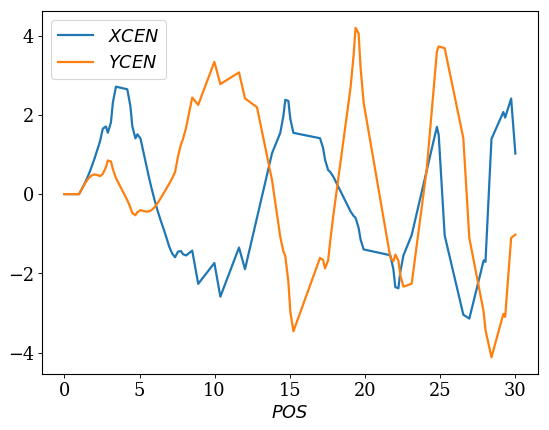

In [7]:
latfile1, fm1 = lat.run()
data = plot_orbit(('pos', 'xcen'), ('pos', 'ycen'), flame_model=fm1)

## Synchronize the model settings to machine
After this operation, the target control environment will be applied with the same settings as model.
```shell
Signature: lat.sync_settings(data_source=None)
Docstring:
Synchronize lattice settings between model and control environment.

Parameters
----------
data_source : str
    Data source of synchronization, if 'model' is defined, will update 
    data of control environment with data from 'model'; if 'control'
    is defined, model data will be synchronized; *data_source* is
    'control' by default.
```

In [8]:
lat.sync_settings(data_source='model')

## (After sync) Check all the settings of horizontal correctors

In [9]:
[(elem.name, elem.I, elem.ANG) for elem in mp.get_elements(type='HCOR')]

[('FE_SCS1:DCH_D0709', -0.29043443029692867, 8.094988441235996e-05),
 ('FE_SCS1:DCH_D0723', -0.22666571498123117, 6.317626807956875e-05),
 ('FE_LEBT:DCH_D0773', -0.5241512163467303, 0.00014609142702016068),
 ('FE_LEBT:DCH_D0790', 0.0, -0.0),
 ('FE_LEBT:DCH_D0805', 0.0, -0.0),
 ('FE_LEBT:DCH_D0821', 0.0, -0.0),
 ('FE_LEBT:DCH_D0840', 0.0, -0.0),
 ('FE_LEBT:DCH_D0868', 0.0, -0.0),
 ('FE_LEBT:DCH_D0880', 0.0, -0.0),
 ('FE_LEBT:DCH_D0901', 0.0, -0.0),
 ('FE_LEBT:DCH_D0929', 0.0, -0.0),
 ('FE_LEBT:DCH_D0948', 1.9110840459015412, -0.0003971997081001763),
 ('FE_LEBT:DCH_D0964', 0.0, -0.0),
 ('FE_LEBT:DCH_D0979', 0.9373252610132997, -0.0001948136822490042),
 ('FE_LEBT:DCH_D0992', 1.1463010877841449, -0.00023824721808505666)]